<h1>What are we going to do today?</h1>
<ul>
    <li>Unsupervised Learning (Clustering)</li>
    <ul>
        <li>K-means</li>
        <li>Hierarchical Clustering</li>
        <li>Gaussian Mixture Mode</li>
    </ul>   
</ul>

<ul>
    <li>Supervised Learning (Classification)</li>
    <ul>
        <li>Decision Tree</li>
        <li>Naive Bayes</li>
        <li>Random Forest</li>
        <li>Support Vector Machine</li>
    </ul> 
</ul>

<h1>Unsupervised Learning</h1>
<ul>
    <li>K-means</li>
    <li>Hierarchical Clustering</li>
    <li>GMM</li>
</ul>

<h1>Dataset</h1>
<ul>
    <li>Wine Dataset</li>
</ul>

In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()

<h2>Wine Dataset</h2>

In [2]:
print wine_data.DESCR

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [3]:
print wine_data.data

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]


<h2>Types of Input Data</h2>
<ul>
    <li>One Mode Matrix</li>
    <li>Two Mode Matrix</li>
</ul>

Data Matrix (Two mode Matrix)
    <li>n object with p attributes</li>
    <li>n * p matrix</li>


In [4]:
two_mode_data = load_wine().data
print type(two_mode_data)
print two_mode_data.shape

<type 'numpy.ndarray'>
(178, 13)


Dissimilarity Matrix ( One mode matrix)
<li>object by object</li>
<li> n * n matrix</li>    

How do we transform two mode data into one mode data<br>

<p>L1 (manhattan) $|x_{1}-x_{2}|+|y_{1}-y_{2}|.$</p>

<p>L2 (euclidean) $\sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}}.$</p>

<p>cosine $\frac {x \cdot y}{||x|| \cdot ||y||}$</p>

<p style="color:red">we can use sklearn.metrics.pairwise</p>

In [5]:
from sklearn.metrics import pairwise
#manhattan
one_mode_L1_data = pairwise.manhattan_distances(load_wine().data,load_wine().data)
#euclidean
one_mode_L2_data = pairwise.euclidean_distances(load_wine().data,load_wine().data)




In [6]:
print one_mode_L1_data.shape
print one_mode_L1_data[0]
print one_mode_L2_data[0]

(178, 178)
[   0.         51.06      152.48      435.09      349.97      403.87
  259.26      241.56       54.48       53.04      471.74      252.49
  296.08      129.02      515.66      266.56      229.28       85.71      641.3
  235.56      287.61      329.54       60.71       89.69      260.06
  253.69      168.32      260.71      177.45       64.34      255.79
  478.21      104.59      182.82       55.72      179.39      207.33
   77.48       80.85      312.36      283.2        77.42       59.67
  417.98      204.82       39.34       29.47      109.1        34.75
  221.24      128.46      236.5       147.38      327.33       17.66
   73.86      107.04      235.15      244.87      603.68      423.84      652.4
  478.99      694.78      747.26      424.89      616.64      615.4       343.78
  382.38      235.544     710.39      648.89      111.9       218.98
  678.34      722.51      594.95      334.42      644.16      841.19
  401.35      503.41      608.91      589.01      654.42  

<h2>K-Means</h2>
<ul>
    <li>sklearn.cluster.Kmeans</li>
    <li>input
    <ul>
        <li>k clusters</li>
        <li>data (n object with p attribute)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;the number of clusters to form as well as the number of centroids to generate<br>
random_state

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(two_mode_data)
print kmeans.labels_

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [8]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(two_mode_data)
print result

[[ -8.36077595   7.2849021 ]
 [ -8.53516197   6.52063942]
 [-10.26767826   8.3820467 ]
 [-12.37274551  10.30195427]
 [ -2.06231618   1.26026249]
 [-12.46025944   9.9488306 ]
 [-11.23775291   9.5406208 ]
 [-11.71478271   9.08666897]
 [ -8.03316593   6.94692612]
 [ -8.42941189   6.43167448]
 [-12.61712456  10.27634716]
 [-11.08740616   9.45271587]
 [-11.56860161   9.68096352]
 [ -9.79683685   7.97825718]
 [-12.71835995  10.3814621 ]
 [-11.71982574   9.35959339]
 [-11.54921532   8.86125278]
 [ -9.52083397   7.723773  ]
 [-12.91493607  10.55104351]
 [ -4.6251421    3.43368649]
 [ -3.14234877   2.24736857]
 [ -2.71136093   2.20888162]
 [ -7.8905015    6.73598719]
 [ -7.68187952   6.40010166]
 [ -4.37542105   3.80056858]
 [ -4.18484735   3.20568061]
 [-10.42653751   8.47989178]
 [-11.15320683   9.50528812]
 [ -5.74079323   4.58552551]
 [ -7.8804822    6.74764872]
 [-11.57347965   8.9817667 ]
 [-12.68220329  10.23360348]
 [ -7.44317913   5.95388842]
 [-10.98907185   8.63161564]
 [ -9.13307762

In [9]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size
        



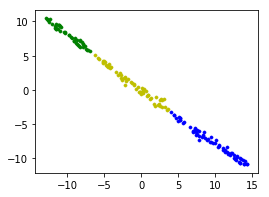

In [10]:
result_0 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_kmeans = plt

<h2>Hierarchical Clustering</h2>
<ul>
<li>sklearn.cluster.AgglomerativeClustering
<li>input
    <ul>
        <li>data (n objects by n objects)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;The number of clusters to find<br>
affinity<br>
&nbsp;&nbsp;&nbsp;Can be 'euclidean'(default), 'L1', 'L2', 'manhattan', 'cosine' or 'precomputed'<br>
linkage<br>
&nbsp;&nbsp;&nbsp;'ward', 'complete', 'average'
<p style="color:red">If linkage is “ward”, only “euclidean” is accepted</p>

In [11]:
from sklearn.cluster import AgglomerativeClustering
L2_hierarchical_1 = AgglomerativeClustering(n_clusters=6, linkage='complete').fit(two_mode_data)
L2_hierarchical_2 = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity='precomputed').fit(one_mode_L2_data)
print L2_hierarchical_1.labels_
print L2_hierarchical_2.labels_

[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]
[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]


In [12]:
hierarchical_example = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(two_mode_data)

In [13]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

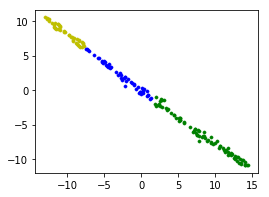

In [14]:
result_0 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_hierarchical = plt

<h2>Gaussian Mixture Mode</h2>
<ul>
<li>sklearn.mixture.GaussianMixture
<li>input
    <ul>
        <li>k clusters
        <li>data (n object with p attributes)</li>
    </ul>
</ul>

n_components<br>
&nbsp;&nbsp;&nbsp;The number of mixture components<br>
covariance_type<br>
&nbsp;&nbsp;&nbsp;‘full’, ‘tied’, ‘diag’, ‘spherical’<br> 
random_state<br>

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(two_mode_data)
gmm_labels = gmm.predict(two_mode_data)
print gmm_labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 1 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

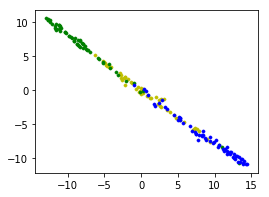

In [17]:
result_0 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 0])
result_1 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 1])
result_2 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_gmm = plt

<h1>Supervised Learning (Classification)</h1>
<ul>
    <li>Decision Tree</li>
    <li>Naive Bayes</li>
    <li>Random Forest</li>
    <li>Support Vector Machine</li>
</ul>

<h1> Datasets </h1>
<ul>
    <li>House-prices(regression)</li>
    <li>Iris(classification)</li>
</ul>

In [18]:
from sklearn.datasets import load_iris, load_boston
iris_data = load_iris()
house_data = load_boston()

<h2>House-prices</h2>

In [19]:
print house_data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
print house_data.target
print house_data.data

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

<h2>Iris</h2>

In [21]:
print iris_data.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [22]:
print iris_data.target
print iris_data.target_names
print iris_data.data
print iris_data.feature_names


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1

<h2>Some problems before applying algorithms</h2>
<ul>
    <li>Feature Engineering</li>
    <li>Cross Validation</li>
    <li>Imbalanced Data</li>
</ul>

<h2>Cross Validation</h2>
<li>Leave One(p) Out Cross Validation (LOOCV)</li>
<li>k-fold Cross Validation</li>

<p style='color:red'>sklearn.model_selection</p>

Leave One Out Cross Validation

In [23]:
from sklearn.model_selection import LeaveOneOut
#in sklearn most of time we use x to present training data
train_data = load_iris().data
#in sklearn most of time we use y to present label
labels = load_iris().target
loocv = LeaveOneOut()
print loocv.get_n_splits(train_data)

150


In [24]:
for train_index, test_index in loocv.split(train_data):
    print train_index, test_index

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

 145 146 147 148 149] [74]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [75]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  

 145 146 147 148 149] [110]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [111]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88

 144 145 146 147 148] [149]


In [25]:
for train_index, test_index in loocv.split(train_data):
    X_train, X_test = train_data[train_index], train_data[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]
    print len(X_train), len(X_test), len(Y_train), len(Y_test)

149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 1 149 1
149 

<h2>Cross Validation</h2>

In [26]:
from sklearn.model_selection import KFold

five_fold = KFold(n_splits=5)
print five_fold.get_n_splits(train_data)

5


In [27]:
for train_index, test_index in five_fold.split(train_data):
    print train_index, test_index

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [28]:
for train_index, test_index in five_fold.split(train_data):
    X_train, X_test = train_data[train_index], train_data[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]
    print len(X_train), len(X_test), len(Y_train), len(Y_test)

120 30 120 30
120 30 120 30
120 30 120 30
120 30 120 30
120 30 120 30


<h2>Imbalanced Data</h2>
<li>Over Sampling</li>
<li>Under Sampling</li>
<li style="color:red">Synthetic Minority Over-sampling Technique (SMOTE) </li>

In [29]:
import numpy as np
from imblearn.over_sampling import SMOTE
print np.count_nonzero(labels == 0)
print np.count_nonzero(labels == 1)
print np.count_nonzero(labels == 2)

50
50
50


In [30]:
new_train_data = load_iris().data[:60]
new_labels = load_iris().target[:60]
print new_train_data
print new_labels

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [31]:
sm = SMOTE(k_neighbors=5)
train_sample, labels_sample = sm.fit_sample(new_train_data,new_labels)
print new_labels
print labels_sample
print np.count_nonzero(labels_sample==1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
50


<h2>Decision Tree</h2>
<ul>
    <li>sklearn.tree.DecisionTreeClassifier</li>
    <li>input
    <ul>
        <li>Training Data</li>
        <li>Label</li>
    </ul>
</ul>

criterion<br>
&nbsp;&nbsp;&nbsp;gini, entropy<br>


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
decision_clf = DecisionTreeClassifier()
decision_clf.fit(iris_data.data,iris_data.target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
from sklearn.model_selection import cross_val_score
decision_clf = DecisionTreeClassifier()
decision_score = cross_val_score(decision_clf, iris_data.data, iris_data.target, cv=5)
print decision_score

[ 0.96666667  0.96666667  0.9         0.96666667  1.        ]


In [38]:
clf = DecisionTreeClassifier()
clf.fit(iris_data.data,iris_data.target)
print clf.predict(iris_data.data[:100])
print clf.predict_proba(iris_data.data[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


<h2>Naive Bayes</h2>
<ul>
    <li>sklearn.naive_bayes
    <ul>
        <li>Gaussian</li>
        <li>Multinomial</li>
        <li>Bernoulli</li>
    </ul>
    <li>input
    <ul>
        <li>Training Data</li>
        <li>Label</li>
    </ul>
</ul>

In [39]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(iris_data.data, iris_data.target)

GaussianNB(priors=None)

In [40]:
print nb_clf.predict(iris_data.data[:50])
print nb_clf.predict_proba(iris_data.data[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  1.00000000e+00   1.38496103e-18   7.25489025e-26]
 [  1.00000000e+00   1.48206242e-17   2.29743996e-25]
 [  1.00000000e+00   1.07780639e-18   2.35065917e-26]
 [  1.00000000e+00   1.43871443e-17   2.89954283e-25]
 [  1.00000000e+00   4.65192224e-19   2.95961100e-26]
 [  1.00000000e+00   1.52598944e-14   1.79883402e-21]
 [  1.00000000e+00   1.13555084e-17   2.79240943e-25]
 [  1.00000000e+00   6.57615274e-18   2.79021029e-25]
 [  1.00000000e+00   9.12219356e-18   1.16607332e-25]
 [  1.00000000e+00   3.20344249e-18   1.12989524e-25]
 [  1.00000000e+00   4.48944985e-18   5.19388089e-25]
 [  1.00000000e+00   1.65734172e-17   7.24605453e-25]
 [  1.00000000e+00   1.19023891e-18   3.06690017e-26]
 [  1.00000000e+00   7.39520546e-20   1.77972179e-27]
 [  1.00000000e+00   2.58242749e-19   8.73399972e-26]
 [  1.00000000e+00   3.17746623e-17   1.73684833e-23]
 [  1.00000000e+00   5.70113578e-

In [41]:
nb_clf = GaussianNB()
GaussianNB_score = cross_val_score(nb_clf, iris_data.data, iris_data.target, cv=5)
print GaussianNB_score

[ 0.93333333  0.96666667  0.93333333  0.93333333  1.        ]


<h2>Random Forest (Ensemble)</h2>
    <li>sklearn.ensemble</li>
    <li>input
    <ul>
        <li>Training Data</li>
        <li>Label</li>
    </ul>

n_estimators<br>
&nbsp;&nbsp;&nbsp;The number of trees in the forest<br>
criterion<br>
&nbsp;&nbsp;&nbsp;gini, entropy<br>
max_features<br>


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(iris_data.data,iris_data.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
print rf_clf.predict(iris_data.data[:50])
print rf_clf.predict_proba(iris_data.data[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [44]:
rf_clf = RandomForestClassifier()
rf_score = cross_val_score(rf_clf, iris_data.data, iris_data.target, cv=5)
print rf_score

[ 0.96666667  0.96666667  0.93333333  0.96666667  0.96666667]


<h2>Support Vector Machine</h2>
    <li>sklearn.svm</li>
    <li>input
    <ul>
        <li>Training Data</li>
        <li>Label</li>
    </ul>

C<br>
&nbsp;&nbsp;&nbsp;Penalty parameter<br>
kernel<br>
&nbsp;&nbsp;&nbsp;linear, polynomial, rbf, sigmoid<br>
gamma<br>
&nbsp;&nbsp;&nbsp;Kernel coefficient 

In [45]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(iris_data.data,iris_data.target)
print svm_clf.predict(iris_data.data[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
svm_clf = SVC(probability=True)
svm_clf.fit(iris_data.data,iris_data.target)
print svm_clf.predict_proba(iris_data.data[:50])

[[ 0.97207872  0.01379738  0.0141239 ]
 [ 0.96857305  0.01638398  0.01504297]
 [ 0.97077423  0.01337115  0.01585462]
 [ 0.96494365  0.01756014  0.01749621]
 [ 0.97183549  0.01335686  0.01480765]
 [ 0.95912682  0.02407512  0.01679806]
 [ 0.96706858  0.01512269  0.01780873]
 [ 0.97038943  0.01522353  0.01438704]
 [ 0.96082493  0.01877236  0.0204027 ]
 [ 0.96769474  0.01677605  0.01552921]
 [ 0.96737606  0.01740527  0.01521867]
 [ 0.96641118  0.01722079  0.01636803]
 [ 0.96854626  0.01557618  0.01587756]
 [ 0.95962327  0.01612173  0.02425499]
 [ 0.95355954  0.02347196  0.0229685 ]
 [ 0.9462986   0.02917906  0.02452235]
 [ 0.96692421  0.01678241  0.01629338]
 [ 0.97171796  0.01437537  0.01390667]
 [ 0.95104117  0.0301846   0.01877423]
 [ 0.969044    0.01556656  0.01538944]
 [ 0.95751952  0.02606882  0.01641166]
 [ 0.96867579  0.0164595   0.01486471]
 [ 0.96266766  0.01423503  0.02309731]
 [ 0.95366745  0.02989038  0.01644218]
 [ 0.94832243  0.03058186  0.02109571]
 [ 0.96079538  0.02305434

In [47]:
svm_clf = SVC()
svm_score = cross_val_score(clf, iris_data.data, iris_data.target, cv=5)
print svm_score

[ 0.96666667  0.96666667  0.9         1.          1.        ]
